<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Industrial-Health-&amp;-Safety-Data-Analysis" data-toc-modified-id="Industrial-Health-&amp;-Safety-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Industrial Health &amp; Safety Data Analysis<a id="1_Industrial_Health_Safety_Analysis"></a></a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction<a id="1.1_Introduction"></a></a></span></li><li><span><a href="#Problem-Identification" data-toc-modified-id="Problem-Identification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Identification<a id="1_Problem_Identification"></a></a></span></li></ul></li><li><span><a href="#Data-wrangling-For-Industrial-Health-&amp;-Safety-Data" data-toc-modified-id="Data-wrangling-For-Industrial-Health-&amp;-Safety-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling For Industrial Health &amp; Safety Data<a id="2_Data_wrangling"></a></a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports<a id="2.1_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Loading the Data<a id="2.2_Loading_Data"></a></a></span><ul class="toc-item"><li><span><a href="#Finding-Missing-Values" data-toc-modified-id="Finding-Missing-Values-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Finding Missing Values<a id="2.2.1_Finding_Missing_Values"></a></a></span></li><li><span><a href="#Saving-Cleaned-File" data-toc-modified-id="Saving-Cleaned-File-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Saving Cleaned File<a id="2.2.2_Finding_Missing_Values"></a></a></span></li></ul></li><li><span><a href="#Summary-of-Industrial-Health-&amp;-Safety-Data-Data-Wrangling-Steps" data-toc-modified-id="Summary-of-Industrial-Health-&amp;-Safety-Data-Data-Wrangling-Steps-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary of Industrial Health &amp; Safety Data Data Wrangling Steps<a id="2.3_Summary"></a></a></span></li></ul></li></ul></div>

# Industrial Health & Safety Data Analysis<a id='1_Industrial_Health_Safety_Analysis'></a>

## Introduction<a id='1.1_Introduction'></a>

The Data Science Method (DSM) process will be used to analyze the Industrial Health and Safety Data provided following the steps shown as below:

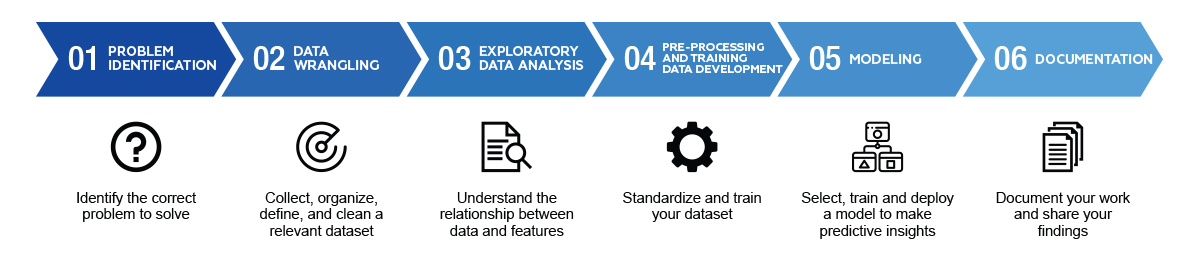

The focus of this notebook is to achieve the following:
- Source, collect, understand and organize the data
- Clean the data
- Convert the data into the formats as required for the further analysis
- Visualize the data provided for the better understanding

Data Source: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

This data is based on the real information from the manufacturing plants and the database is basically records of accidents from 12 different plants in 03 different countries with column descriptions as follow:

<font color=blue>__Column Descriptions__</font>

    - Data: timestamp or time/date information
    - Countries: which country the accident occurred (anonymized)
    - Local: the city where the manufacturing plant is located (anonymized)
    - Industry sector: which sector the plant belongs to
    - Accident level: from I to VI, it registers how severe was the accident (I is not severe & VI is very severe)
    - Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    - Genre: if the person is male of female
    - Employee or Third Party: if the injured person is an employee or a third party
    - Critical Risk: some description of the risk involved in the accident
    - Description: Detailed description of how the accident happened.


## Problem Identification<a id='1_Problem_Identification'></a>

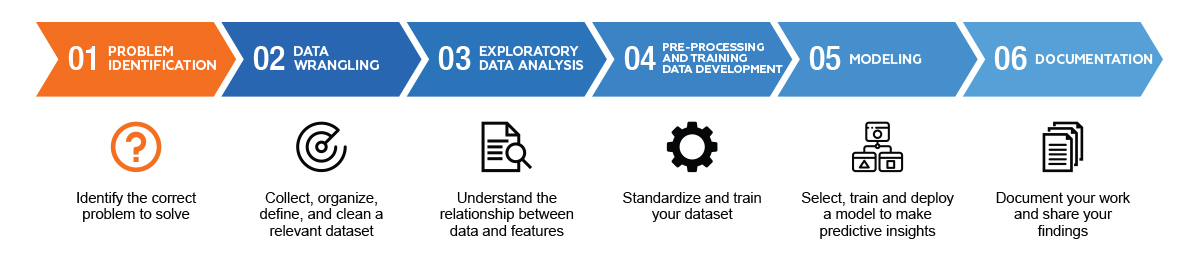

There are __3 main goals__ of this project which are listed below:

1. Which gender is more at risk and is involved more with these accidents?
2. Between third party contractor and employee, which one is more at risk?
3. What are the main causes of these accidents?

# Data wrangling For Industrial Health & Safety Data<a id='2_Data_wrangling'></a>

## Imports<a id='2.1_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style; style.use('fivethirtyeight')
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file
import missingno as msno

## Loading the Data<a id='2.2_Loading_Data'></a>

In [2]:
# Loading the csv data file here
data = pd.read_csv('../raw_data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [3]:
# Finding the data type here for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


__Quick Action Plan__

Based on the visual inspection of the above data, there are few action items listed below:
1. Drop 'Unnamed:0' column as it is not adding any value here.
2. Rename the columns
3. Data column contains date timestamp, so change the type so that we can get the data for week, month etc over the time.
4. Count the values for each country
5. Count the values for each locality
6. Count of values for each industrial sector
7. Count of values for each accident level
8. Count of values for each potential accident level
9. Count of values for each gender
10. Count of values for third party or employee
11. Count of values for critical risks
12. Visualize the data as required based on the quick action plan

In [4]:
# Focusing on the first 3 quick action plan items
data.drop('Unnamed: 0', axis=1, inplace=True)
data.rename(columns={'Data': 'Date', 'Countries': 'Country', 'Industry Sector': 'Industry', 'Accident Level': 'Accident_level', 'Potential Accident Level': 'Pot_acc_level', 'Genre': 'Gender', 'Employee or Third Party': 'Emp_type', 'Critical Risk': 'Critical_risk'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Country,Local,Industry,Accident_level,Pot_acc_level,Gender,Emp_type,Critical_risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
# Printing count values here for columns
print("Values for Country category are:", data['Country'].value_counts(), sep="\n\n")
print("..............................")
print("Values for Industry category are:", data['Industry'].value_counts(), sep="\n\n")
print("..............................")
print("Values for Accident Level category are:", data['Accident_level'].value_counts(), sep="\n\n")
print("..............................")
print("Values for Potential Accident Level category are:", data['Pot_acc_level'].value_counts(), sep="\n\n")
print("..............................")
print("Values for Gender category are:", data['Gender'].value_counts(), sep="\n\n")
print("..............................")
print("Values for Employee Type category are:", data['Emp_type'].value_counts(), sep="\n\n")
print("..............................")
print("Values for Critical Risks category are:", data['Critical_risk'].value_counts(), sep="\n\n")

Values for Country category are:

Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64
..............................
Values for Industry category are:

Mining    241
Metals    134
Others     50
Name: Industry, dtype: int64
..............................
Values for Accident Level category are:

I      316
II      40
III     31
IV      30
V        8
Name: Accident_level, dtype: int64
..............................
Values for Potential Accident Level category are:

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Pot_acc_level, dtype: int64
..............................
Values for Gender category are:

Male      403
Female     22
Name: Gender, dtype: int64
..............................
Values for Employee Type category are:

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Emp_type, dtype: int64
..............................
Values for Critical Risks category are:

Others                      

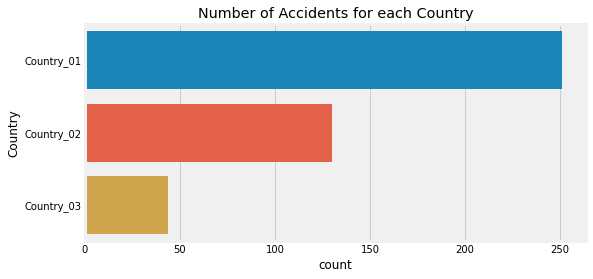

In [6]:
# Visualizing the count values now for each country
plt.figure(figsize=(8,4))
sns.countplot(y='Country', data=data, orient='h')
plt.title("Number of Accidents for each Country")
plt.show()

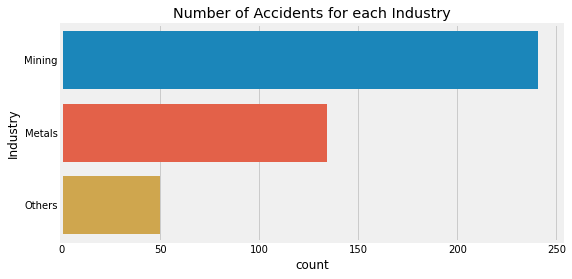

In [7]:
# Visualizing the count values now for each Industry
plt.figure(figsize=(8,4))
sns.countplot(y='Industry', data=data, orient='h')
plt.title("Number of Accidents for each Industry")
plt.show()

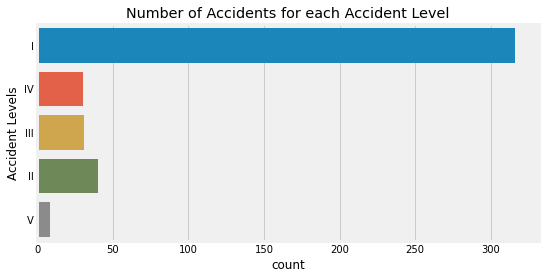

In [8]:
# Visualizing the count values now for Accident Levels
plt.figure(figsize=(8,4))
sns.countplot(y='Accident_level', data=data, orient='h')
plt.ylabel("Accident Levels")
plt.title("Number of Accidents for each Accident Level")
plt.show()

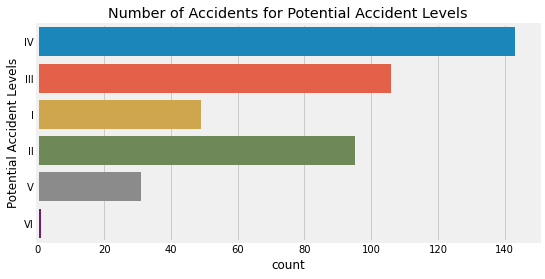

In [9]:
# Visualizing the count values now for Potential Accident Levels
plt.figure(figsize=(8,4))
sns.countplot(y='Pot_acc_level', data=data, orient='h')
plt.ylabel("Potential Accident Levels")
plt.title("Number of Accidents for Potential Accident Levels")
plt.show()

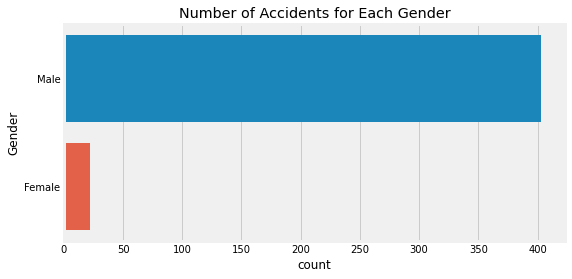

In [10]:
# Visualizing the count values now for each gender
plt.figure(figsize=(8,4))
sns.countplot(y='Gender', data=data, orient='h')
plt.title("Number of Accidents for Each Gender")
plt.show()

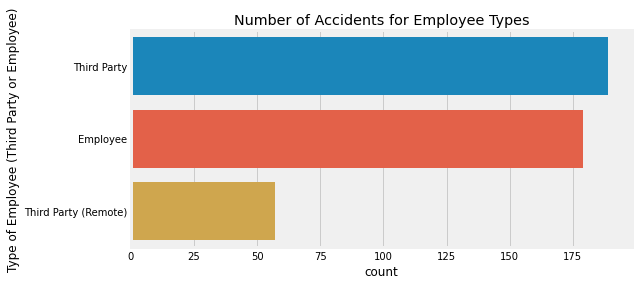

In [11]:
# Visualizing the count values now for Employee Type
plt.figure(figsize=(8,4))
sns.countplot(y='Emp_type', data=data, orient='h')
plt.ylabel("Type of Employee (Third Party or Employee)")
plt.title("Number of Accidents for Employee Types")
plt.show()

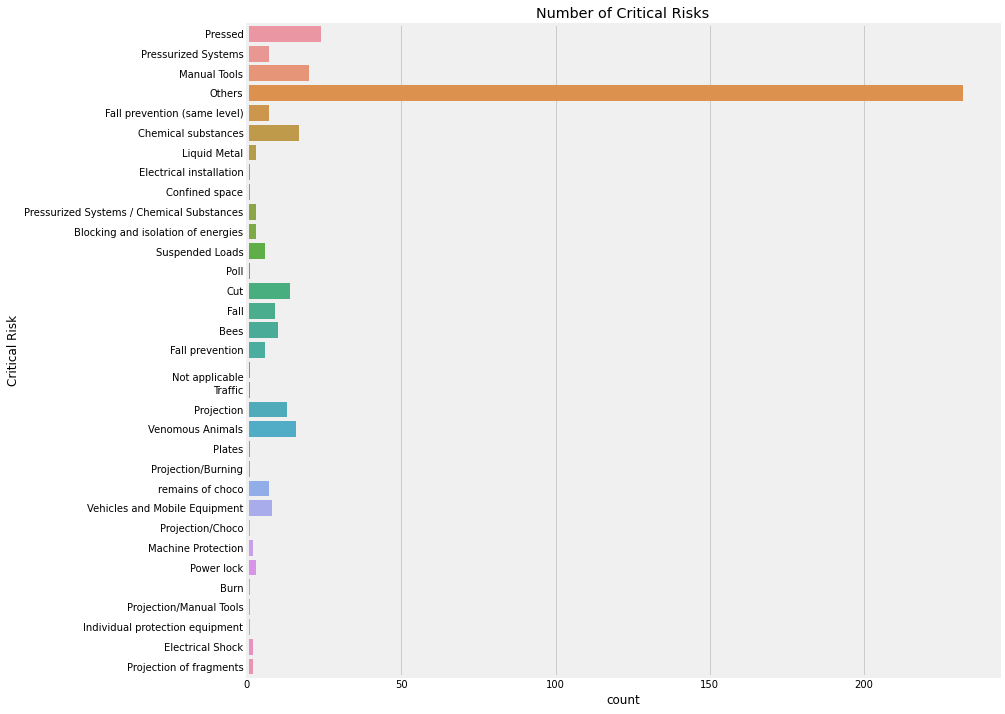

In [12]:
# Visualizing the count values now for Critical Risk
plt.figure(figsize=(12,12))
sns.countplot(y='Critical_risk', data=data, orient='h')
plt.ylabel("Critical Risk")
plt.title("Number of Critical Risks")
plt.show()

### Finding Missing Values<a id='2.2.1_Finding_Missing_Values'></a>

<AxesSubplot:>

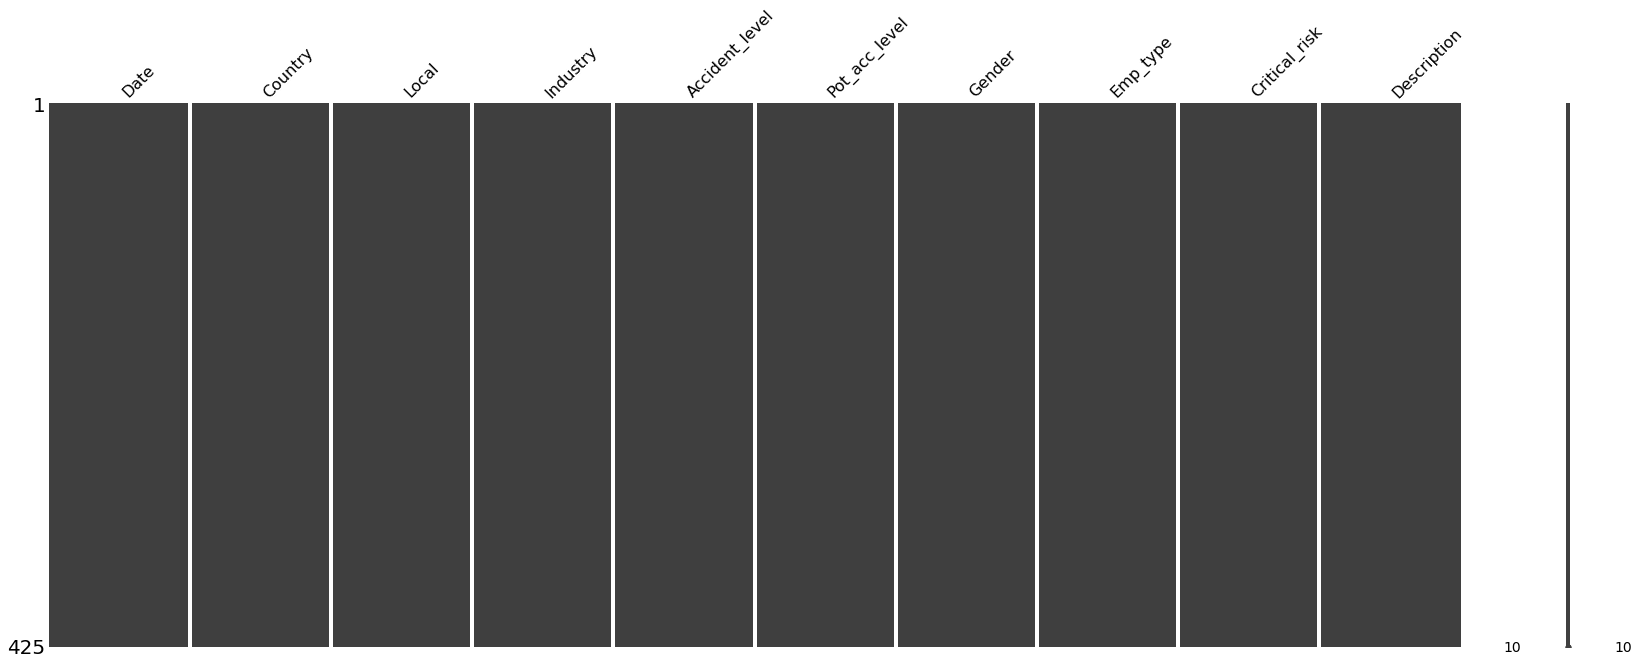

In [13]:
# Checking with msno matrix command for the null or missing values
msno.matrix(data)

<AxesSubplot:>

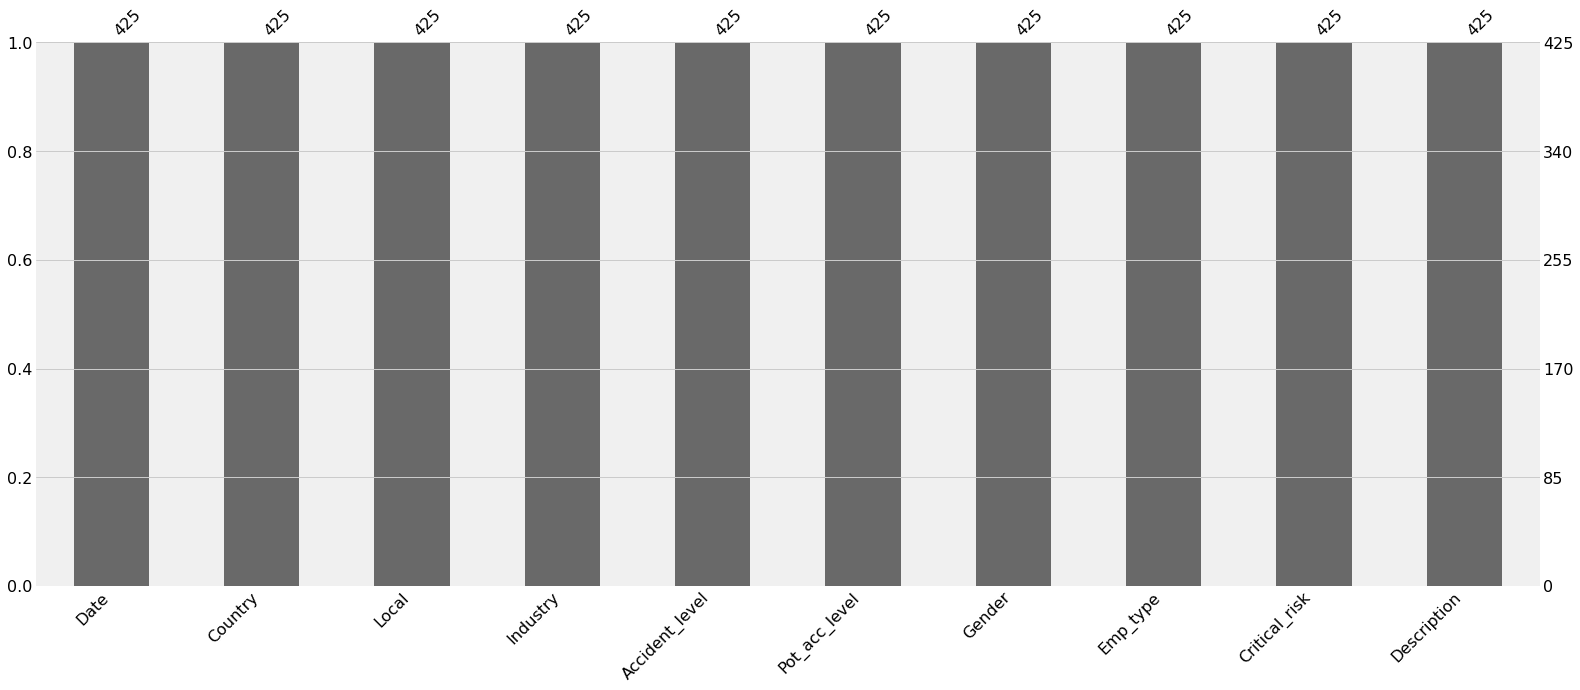

In [14]:
# Checking with msno bar command for the null or missing values
msno.bar(data)

Both the above command confirms that there are no missing values here in any columns.

In [15]:
# Converting the values to lower string for the columns
data['Country'] = data['Country'].str.lower()
data['Local'] = data['Local'].str.lower()
data['Industry'] = data['Industry'].str.lower()
data['Gender'] = data['Gender'].str.lower()
data['Emp_type'] = data['Emp_type'].str.lower()
data['Critical_risk'] = data['Critical_risk'].str.lower()
data['Description'] = data['Description'].str.lower()
data.head()

,Date,Country,Local,Industry,Accident_level,Pot_acc_level,Gender,Emp_type,Critical_risk,Description
0,2016-01-01,country_01,local_01,mining,I,IV,male,third party,pressed,while removing the drill rod of the jumbo 08 f...
1,2016-01-02,country_02,local_02,mining,I,IV,male,employee,pressurized systems,during the activation of a sodium sulphide pum...
2,2016-01-06,country_01,local_03,mining,I,III,male,third party (remote),manual tools,in the sub-station milpo located at level +170...
3,2016-01-08,country_01,local_04,mining,I,I,male,third party,others,being 9:45 am. approximately in the nv. 1880 c...
4,2016-01-10,country_01,local_04,mining,IV,IV,male,third party,others,approximately at 11:45 a.m. in circumstances t...


In [16]:
# Converting the current roman characters for the Accident Level and Potential Accident Level to a numeric value
convert_roman = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
data['Accident_level'] = data['Accident_level'].replace(convert_roman)
data['Pot_acc_level'] = data['Pot_acc_level'].replace(convert_roman)
data.head()

,Date,Country,Local,Industry,Accident_level,Pot_acc_level,Gender,Emp_type,Critical_risk,Description
0,2016-01-01,country_01,local_01,mining,1,4,male,third party,pressed,while removing the drill rod of the jumbo 08 f...
1,2016-01-02,country_02,local_02,mining,1,4,male,employee,pressurized systems,during the activation of a sodium sulphide pum...
2,2016-01-06,country_01,local_03,mining,1,3,male,third party (remote),manual tools,in the sub-station milpo located at level +170...
3,2016-01-08,country_01,local_04,mining,1,1,male,third party,others,being 9:45 am. approximately in the nv. 1880 c...
4,2016-01-10,country_01,local_04,mining,4,4,male,third party,others,approximately at 11:45 a.m. in circumstances t...


In [17]:
# Since we will be using 'Date' column for day, week, month and year later, let us convert this accordingly
data['Day'] = data['Date'].apply(lambda x: x.day)
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Weekday'] = data['Date'].apply(lambda x: x.day_name)
data.head()

,Date,Country,Local,Industry,Accident_level,Pot_acc_level,Gender,Emp_type,Critical_risk,Description,Day,Month,Year,Weekday
0,2016-01-01,country_01,local_01,mining,1,4,male,third party,pressed,while removing the drill rod of the jumbo 08 f...,1,1,2016,<built-in method day_name of Timestamp object ...
1,2016-01-02,country_02,local_02,mining,1,4,male,employee,pressurized systems,during the activation of a sodium sulphide pum...,2,1,2016,<built-in method day_name of Timestamp object ...
2,2016-01-06,country_01,local_03,mining,1,3,male,third party (remote),manual tools,in the sub-station milpo located at level +170...,6,1,2016,<built-in method day_name of Timestamp object ...
3,2016-01-08,country_01,local_04,mining,1,1,male,third party,others,being 9:45 am. approximately in the nv. 1880 c...,8,1,2016,<built-in method day_name of Timestamp object ...
4,2016-01-10,country_01,local_04,mining,4,4,male,third party,others,approximately at 11:45 a.m. in circumstances t...,10,1,2016,<built-in method day_name of Timestamp object ...


In [18]:
# Checking the current data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            425 non-null    datetime64[ns]
 1   Country         425 non-null    object        
 2   Local           425 non-null    object        
 3   Industry        425 non-null    object        
 4   Accident_level  425 non-null    int64         
 5   Pot_acc_level   425 non-null    int64         
 6   Gender          425 non-null    object        
 7   Emp_type        425 non-null    object        
 8   Critical_risk   425 non-null    object        
 9   Description     425 non-null    object        
 10  Day             425 non-null    int64         
 11  Month           425 non-null    int64         
 12  Year            425 non-null    int64         
 13  Weekday         425 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 46

### Saving Cleaned File<a id='2.2.2_Finding_Missing_Values'></a>

In [19]:
# save the data to a new csv file
datapath = '../data'
save_file(data, 'data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\data_cleaned.csv"


## Summary of Industrial Health & Safety Data Data Wrangling Steps<a id='2.3_Summary'></a>

We have completed the following 2 stages of our analysis:
1. Problem Definition
2. Data Wrangling
Based on the analysis in this notebook, we have the following insights for the given data:
- All columns except 'Description' have been cleaned.
- Date column has been broken down into day, month and year for further analysis.
- Description column is text-based, hence it will be focused during the EDA phase.
- Value counts for each required column was identified and visually plotted for the quick reference.
- The data file has been saved as cleaned version for the EDA phase.